In [1]:
from pulp import *
import numpy as np
import matplotlib.pyplot as plt

In [96]:
model = LpProblem(name="ex1-problem", sense=LpMaximize)

x1 = LpVariable(name="x1", lowBound=0)
x2 = LpVariable(name="x2", lowBound=0)
x3 = LpVariable(name="x3", lowBound=0)
x4 = LpVariable(name="x4", lowBound=0)

objective = 5*x1 + 3*x2 + x3 +4*x4 

In [97]:
constraint1 = x1 - 2*x2 + 2*x3 + 3*x4 <= 10
constraint2 = 2*x1 + 2*x2 + 2*x3 -x4 <= 6
constraint3 = 3*x1 + x2 - x3 +x4 <= 10
constraint4 = -x2 + 2*x3 + 2*x4 <= 7

In [98]:
model += (constraint1, 'constraint1')
model += (constraint2, 'constraint2')
model += (constraint3, 'constraint3')
model += (constraint4, 'constraint4')

In [99]:
model += objective

In [7]:
def summary(model):
    print(model.status,'\n') #1 if optimal solution was found
    print(f"objective: {np.round(model.objective.value(),4)}\n") #objective function optimal value

    for var in model.variables(): #for each variable, print optimal values, and if != label them as basic
        print(f"{var.name}: {np.round(var.value(),4)} {'basic' * int(np.round(var.value(),4)!=0)}")
    print('\n')

    for name, constraint in model.constraints.items(): #for each constraint, print their final values, and if ==0 label them as binding
         print(f"{name}: {np.round(constraint.value(),4)} {'binding' * int(np.round(constraint.value(),4)==0) }")

In [93]:
[np.round(i.value(),7) for j,i in model.constraints.items()]

[-30.0, 82.0, 0.0, 0.0]

In [44]:
print(model)

ex1-problem:
MAXIMIZE
5*x1 + 3*x2 + 1*x3 + 4*x4 + 0
SUBJECT TO
constraint1: x1 - 2 x2 + 2 x3 + 3 x4 <= 10

constraint2: 2 x1 + 2 x2 + 2 x3 - x4 <= 6

constraint3: 3 x1 + x2 - x3 + x4 <= 10

constraint4: - x2 + 2 x3 + 2 x4 <= 7

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous



In [100]:
status = model.solve()

In [101]:
summary(model)

1 

objective: 37.8667

x1: 0.0 
x2: 5.1333 basic
x3: 0.6 basic
x4: 5.4667 basic


constraint1: -2.6667 
constraint2: -0.0 binding
constraint3: 0.0 binding
constraint4: 0.0 binding


In [132]:
B = np.array([[-2,2,3,1],[2,2,-1,0],[1,-1,1,0],[-1,2,2,0]])
b = np.array([10,6,10,7])

In [136]:
np.linalg.inv(B)@b

array([5.13333333, 0.6       , 5.46666667, 2.66666667])

In [119]:
c1 = np.linalg.inv(B)@b
c2 = np.linalg.inv(B)@np.array([0,1,0,0])

print(c1)
print(c2)
c1/c2

[5.13333333 0.6        5.46666667 2.66666667]
[ 0.26666667  0.2        -0.06666667  0.33333333]


array([ 19.25,   3.  , -82.  ,   8.  ])

In [138]:
c1 = np.linalg.inv(B)@b
c2 = np.linalg.inv(B)@np.array([1,0,0,0])

print(c1)
print(c2)
c1/c2

[5.13333333 0.6        5.46666667 2.66666667]
[0. 0. 0. 1.]


<ipython-input-138-c675fb9beac3>:6: RuntimeWarning: divide by zero encountered in true_divide
  c1/c2


array([       inf,        inf,        inf, 2.66666667])

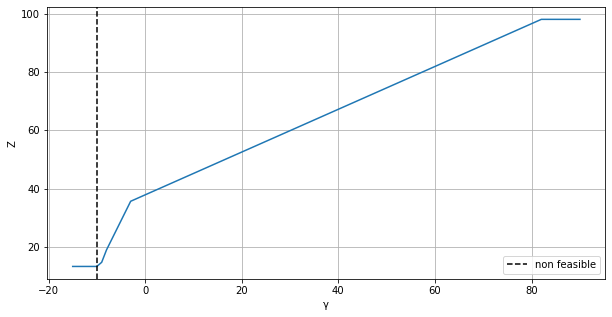

In [127]:
gammas = np.linspace(-15,90,106) #vector containing gamma values
z=[] #vector that will store Z values for eavh gamma

for gamma in gammas: #for each gamma
    model.constraints['constraint2'] -= gamma #subtract gamma from constraint = adding it to the rhs
    status = model.solve() #solve it
        
    if status == -1: #if no optimal solution was found store gamma as non feasibility point
        non_feasibility_point = gamma
    z.append(np.round(model.objective.value(),4)) #store z value
    model.constraints['constraint2'] += gamma #undo constraint change

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(gammas,z)
plt.xlabel('γ')
plt.ylabel('Z')
plt.axvline(non_feasibility_point,color='black',linestyle='--', label='non feasible')
plt.legend()

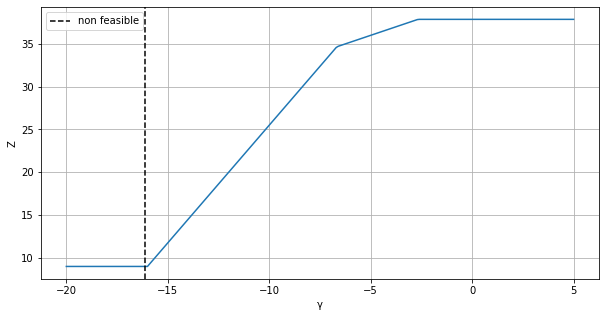

In [126]:
gammas = np.linspace(-20,5,251)
z=[]

for gamma in gammas:
    model.constraints['constraint1'] -= gamma
    status = model.solve()
    
    if status == -1:
        non_feasibility_point = gamma
    z.append(np.round(model.objective.value(),4))
    model.constraints['constraint1'] += gamma

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(gammas,z)
plt.xlabel('γ')
plt.ylabel('Z')
plt.axvline(non_feasibility_point,color='black',linestyle='--', label='non feasible')
plt.legend()

In [73]:
list(np.nonzero([i.value() for i in model.variables()])[0])

[1, 2, 3]

In [12]:
model2 = LpProblem(name="dual-problem", sense=LpMinimize)

y1 = LpVariable(name="y1", lowBound=0)
y2 = LpVariable(name="y2", lowBound=0)
y3 = LpVariable(name="y3", lowBound=0)
y4 = LpVariable(name="y4", lowBound=0)

objective = 10*y1 + 6*y2 + 10*y3 +7*y4 

constraint1 = y1 + 2*y2 + 3*y3  >= 5
constraint2 = -2*y1 + 2*y2 + y3 - y4 >= 3
constraint3 = 2*y1 + 2*y2 - y3 + 2*y4 >= 1
constraint4 = 3*y1 - y2 + y3 + 2*y4 >= 4

model2 += (constraint1, 'constraint1')
model2 += (constraint2, 'constraint2')
model2 += (constraint3, 'constraint3')
model2 += (constraint4, 'constraint4')

model2 += objective

In [13]:
model2.solve()
summary(model2)

1 

objective: 37.8667

y1: 0.0 
y2: 0.7333 basic
y3: 2.6 basic
y4: 1.0667 basic


constraint1: 4.2667 
constraint2: -0.0 binding
constraint3: 0.0 binding
constraint4: 0.0 binding


In [14]:
summary(model)

1 

objective: 37.8667

x1: 0.0 
x2: 5.1333 basic
x3: 0.6 basic
x4: 5.4667 basic


constraint1: -2.6667 
constraint2: -0.0 binding
constraint3: 0.0 binding
constraint4: 0.0 binding


$Ασκηση 4$

In [22]:
A = np.array([[1,3,0],[2,1,1],[1,0,1]])
b = np.array([6,1,-1])
x = np.linalg.solve(A,b)

In [23]:
x

array([-1.11022302e-16,  2.00000000e+00, -1.00000000e+00])

In [166]:
x@np.array([5,8,1])

15.0

In [163]:
6*3 - 1 -2

15

In [167]:
x

array([-1.11022302e-16,  2.00000000e+00, -1.00000000e+00])

$Άσκηση 3$

In [250]:
model3 = LpProblem(name="waiters", sense=LpMinimize)

c1 = LpVariable(name="c1", lowBound=0, cat='Integer')
c2 = LpVariable(name="c2", lowBound=0, cat='Integer')
c3 = LpVariable(name="c3", lowBound=0, cat='Integer')
c4 = LpVariable(name="c4", lowBound=0, cat='Integer')
c5 = LpVariable(name="c5", lowBound=0, cat='Integer')
c6 = LpVariable(name="c6", lowBound=0, cat='Integer')
c7 = LpVariable(name="c7", lowBound=0, cat='Integer')

objective = c1+c2+c3+c4+c5+c6+c7

constraint1 = c1 + c4 + c5 +c6 +c7  >= 17
constraint2 = c1 + c2 + c5 +c6 +c7  >= 13
constraint3 = c1 + c2 + c3 +c6 +c7  >= 15
constraint4 = c1 + c2 + c3 +c4 +c7  >= 19
constraint5 = c1 + c2 + c3 +c4 +c5  >= 14
constraint6 = c2 + c3 + c4 +c5 +c6  >= 16
constraint7 = c3 + c4 + c5 +c6 +c7  >= 11

model3 += (constraint1, 'constraint1')
model3 += (constraint2, 'constraint2')
model3 += (constraint3, 'constraint3')
model3 += (constraint4, 'constraint4')
model3 += (constraint5, 'constraint5')
model3 += (constraint6, 'constraint6')
model3 += (constraint7, 'constraint7')

model3 += objective

In [251]:
model3

waiters:
MINIMIZE
1*c1 + 1*c2 + 1*c3 + 1*c4 + 1*c5 + 1*c6 + 1*c7 + 0
SUBJECT TO
constraint1: c1 + c4 + c5 + c6 + c7 >= 17

constraint2: c1 + c2 + c5 + c6 + c7 >= 13

constraint3: c1 + c2 + c3 + c6 + c7 >= 15

constraint4: c1 + c2 + c3 + c4 + c7 >= 19

constraint5: c1 + c2 + c3 + c4 + c5 >= 14

constraint6: c2 + c3 + c4 + c5 + c6 >= 16

constraint7: c3 + c4 + c5 + c6 + c7 >= 11

VARIABLES
0 <= c1 Integer
0 <= c2 Integer
0 <= c3 Integer
0 <= c4 Integer
0 <= c5 Integer
0 <= c6 Integer
0 <= c7 Integer

In [252]:
model3.solve()
summary(model3)

objective: 23.0

c1: 2.0 basic
c2: 6.0 basic
c3: 0.0 
c4: 7.0 basic
c5: 0.0 
c6: 3.0 basic
c7: 5.0 basic


constraint1: 0.0 binding
constraint2: 3.0 
constraint3: 1.0 
constraint4: 1.0 
constraint5: 1.0 
constraint6: 0.0 binding
constraint7: 4.0 


In [243]:
model3 = LpProblem(name="waiters", sense=LpMinimize)

c1 = LpVariable(name="c1", lowBound=0)
c2 = LpVariable(name="c2", lowBound=0)
c3 = LpVariable(name="c3", lowBound=0)
c4 = LpVariable(name="c4", lowBound=0)
c5 = LpVariable(name="c5", lowBound=0)
c6 = LpVariable(name="c6", lowBound=0)
c7 = LpVariable(name="c7", lowBound=0)

objective = c1+c2+c3+c4+c5+c6+c7

constraint1 = c1 + c4 + c5 +c6 +c7  >= 17
constraint2 = c1 + c2 + c5 +c6 +c7  >= 13
constraint3 = c1 + c2 + c3 +c6 +c7  >= 15
constraint4 = c1 + c2 + c3 +c4 +c7  >= 19
constraint5 = c1 + c2 + c3 +c4 +c5  >= 14
constraint6 = c2 + c3 + c4 +c5 +c6  >= 16
constraint7 = c3 + c4 + c5 +c6 +c7  >= 11

model3 += (constraint1, 'constraint1')
model3 += (constraint2, 'constraint2')
model3 += (constraint3, 'constraint3')
model3 += (constraint4, 'constraint4')
model3 += (constraint5, 'constraint5')
model3 += (constraint6, 'constraint6')
model3 += (constraint7, 'constraint7')

model3 += objective

In [217]:
model3

waiters:
MINIMIZE
1*c1 + 1*c2 + 1*c3 + 1*c4 + 1*c5 + 1*c6 + 1*c7 + 0
SUBJECT TO
constraint1: c1 + c4 + c5 + c6 + c7 >= 17

constraint2: c1 + c2 + c5 + c6 + c7 >= 13

constraint3: c1 + c2 + c3 + c6 + c7 >= 15

constraint4: c1 + c2 + c3 + c4 + c7 >= 19

constraint5: c1 + c2 + c3 + c4 + c5 >= 14

constraint6: c2 + c3 + c4 + c5 + c6 >= 16

constraint7: c3 + c4 + c5 + c6 + c7 >= 11

VARIABLES
c1 Continuous
c2 Continuous
c3 Continuous
c4 Continuous
c5 Continuous
c6 Continuous
c7 Continuous

In [175]:
model3.solve()
summary(model3)

objective: 22.3333

c1: 1.3333 basic
c2: 5.3333 basic
c3: 0.0 
c4: 7.3333 basic
c5: 0.0 
c6: 3.3333 basic
c7: 5.0 basic


constraint1: -0.0 binding
constraint2: 2.0 
constraint3: -0.0 binding
constraint4: -0.0 binding
constraint5: -0.0 binding
constraint6: -0.0 binding
constraint7: 4.6667 


In [19]:
model4 = LpProblem(name="less_waiters_on_weekends", sense=LpMaximize)

c1 = LpVariable(name="c1", lowBound=0)
c2 = LpVariable(name="c2", lowBound=0)
c3 = LpVariable(name="c3", lowBound=0)
c4 = LpVariable(name="c4", lowBound=0)
c5 = LpVariable(name="c5", lowBound=0)
c6 = LpVariable(name="c6", lowBound=0)
c7 = LpVariable(name="c7", lowBound=0)

objective = c1

constraint1 = c1 + c4 + c5 +c6 +c7  >= 17
constraint2 = c1 + c2 + c5 +c6 +c7  >= 13
constraint3 = c1 + c2 + c3 +c6 +c7  >= 15
constraint4 = c1 + c2 + c3 +c4 +c7  >= 19
constraint5 = c1 + c2 + c3 +c4 +c5  >= 14
constraint6 = c2 + c3 + c4 +c5 +c6  >= 16
constraint7 = c3 + c4 + c5 +c6 +c7  >= 11
constraint8 = c1+c2+c3+c4+c5+c6+c7  == 23

model4 += (constraint1, 'constraint1')
model4 += (constraint2, 'constraint2')
model4 += (constraint3, 'constraint3')
model4 += (constraint4, 'constraint4')
model4 += (constraint5, 'constraint5')
model4 += (constraint6, 'constraint6')
model4 += (constraint7, 'constraint7')
model4 += (constraint8, 'constraint8')

model4 += objective

In [20]:
model4

less_waiters_on_weekends:
MAXIMIZE
1*c1 + 0
SUBJECT TO
constraint1: c1 + c4 + c5 + c6 + c7 >= 17

constraint2: c1 + c2 + c5 + c6 + c7 >= 13

constraint3: c1 + c2 + c3 + c6 + c7 >= 15

constraint4: c1 + c2 + c3 + c4 + c7 >= 19

constraint5: c1 + c2 + c3 + c4 + c5 >= 14

constraint6: c2 + c3 + c4 + c5 + c6 >= 16

constraint7: c3 + c4 + c5 + c6 + c7 >= 11

constraint8: c1 + c2 + c3 + c4 + c5 + c6 + c7 = 23

VARIABLES
c1 Continuous
c2 Continuous
c3 Continuous
c4 Continuous
c5 Continuous
c6 Continuous
c7 Continuous

In [21]:
model4.solve()
summary(model4)

1 

objective: 7.0

c1: 7.0 basic
c2: 2.0 basic
c3: 4.0 basic
c4: 6.0 basic
c5: 2.0 basic
c6: 2.0 basic
c7: 0.0 


constraint1: 0.0 binding
constraint2: 0.0 binding
constraint3: 0.0 binding
constraint4: 0.0 binding
constraint5: 7.0 
constraint6: 0.0 binding
constraint7: 3.0 
constraint8: 0.0 binding


$Άσκηση \ 3$

In [277]:
model4 = LpProblem(name="ex3", sense=LpMaximize)

x1 = LpVariable(name="x1", cat='Binary')
x2 = LpVariable(name="x2", cat='Binary')
x3 = LpVariable(name="x3", cat='Binary')
x4 = LpVariable(name="x4", cat='Binary')
x5 = LpVariable(name="x5", cat='Binary')


objective = 23*x1+17*x2+14*x4+9*x5

#constraint1 = 6*x1+5*x2+10*x3+7*x4+5*x5  <= 14
constraint1 = x1 + x2 + x4 + x5 <= 2

model4 += (constraint1, 'constraint1')
model4 += objective

In [266]:
model4.solve()
summary(model4)

objective: 40.0

x1: 1.0 basic
x2: 1.0 basic
x4: 0.0 
x5: 0.0 


constraint1: 0.0 binding


In [287]:
model4 = LpProblem(name="ex3", sense=LpMaximize)

x1 = LpVariable(name="x1", lowBound=0)
x2 = LpVariable(name="x2", lowBound=0)
x3 = LpVariable(name="x3", lowBound=0)
x4 = LpVariable(name="x4", lowBound=0)
x5 = LpVariable(name="x5", lowBound=0)

objective = 23*x1+17*x2+30*x3+14*x4+9*x5

constraint1 = 6*x1+5*x2+10*x3+7*x4+5*x5  <= 14

model4 += (constraint1, 'constraint1')
model4 += objective

In [268]:
model4.solve()
summary(model4)

objective: 53.6667

x1: 2.3333 basic
x2: 0.0 
x3: 0.0 
x4: 0.0 
x5: 0.0 


constraint1: -0.0 binding


In [291]:
model4 = LpProblem(name="ex3", sense=LpMaximize)

x1 = LpVariable(name="x1", cat='Binary')
x2 = LpVariable(name="x2", cat='Binary')
x3 = LpVariable(name="x3", cat='Binary')
x4 = LpVariable(name="x4", cat='Binary')
x5 = LpVariable(name="x5", cat='Binary')


objective = 23*x1+17*x2+30*x3+14*x4+9*x5

constraint1 = 6*x1+5*x2+10*x3+7*x4+5*x5  <= 14
constraint2 = x1 + x3 <= 1
constraint3 = x2 + x3 <= 1
constraint4 = x3 + x4 <= 1


model4 += (constraint1, 'constraint1')
model4 += (constraint2, 'constraint2')
model4 += (constraint3, 'constraint3')
model4 += (constraint4, 'constraint4')

model4 += objective

In [292]:
model4.solve()
summary(model4)

1 

objective: 40.0

x1: 1.0 basic
x2: 1.0 basic
x3: 0.0 
x4: 0.0 
x5: 0.0 


constraint1: -3.0 
constraint2: 0.0 binding
constraint3: 0.0 binding
constraint4: -1.0 


In [29]:
model4 = LpProblem(name="ex3", sense=LpMaximize)

x1 = LpVariable(name="x1", lowBound=0)
x2 = LpVariable(name="x2", lowBound=0)
x3 = LpVariable(name="x3", lowBound=0)
x4 = LpVariable(name="x4", lowBound=0)
x5 = LpVariable(name="x5", lowBound=0)

objective = 23*x1+17*x2+30*x3+14*x4+9*x5

constraint1 = 6*x1+5*x2+10*x3+7*x4+5*x5  <= 14
constraint2 = x1 + x3 <= 1
constraint3 = x2 + x3 <= 1
constraint4 = x3 + x4 <= 1


model4 += (constraint1, 'constraint1')
model4 += (constraint2, 'constraint2')
model4 += (constraint3, 'constraint3')
model4 += (constraint4, 'constraint4')

model4 += objective

In [35]:
model4.variables()[0].upBound = 0
model4.variables()[0].lowBound = 0

model4.solve()
summary(model4)

1 

objective: 26.0

x1: 0.0 
x2: 1.0 basic
x3: 0.0 
x4: 0.0 
x5: 1.0 basic


constraint1: -4.0 
constraint2: -1.0 
constraint3: 0.0 binding
constraint4: -1.0 
